<a href="https://colab.research.google.com/github/tnzmnjm/christmas-coding-challenge-2024/blob/main/notebooks/Day%2010/Pytorch_day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A.6 Setting up efficient data loaders**

Before we can train our model, we have to briefly discuss creating efficient data loaders in PyTorch, which we will iterate over during training. The overall idea behind data loading in PyTorch is illustrated in figure below:

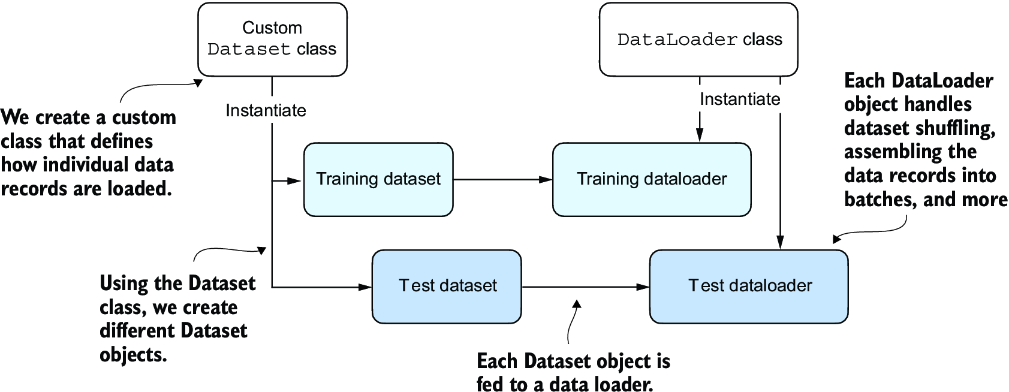

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/Data science/Build a Large Language Model (From Scratch)/Pytorch/images/dataset_dataloader.png')

PyTorch implements a `Dataset` and a `DataLoader` class. The `Dataset` class is used to instantiate objects that define how each data record is loaded. The `DataLoader` handles how the data is shuffled and assembled into batches.

Following figure above, we will implement a custom `Dataset` class, which we will use to create a training and a test dataset that we’ll then use to create the data loaders. Let’s start by creating a simple toy dataset of five training examples with two features each. Accompanying the training examples, we also create a tensor containing the corresponding class labels: three examples belong to class `0`, and two examples belong to class `1`. In addition, we make a test set consisting of two entries. The code to create this dataset is shown in the following listing.

In [2]:
import torch

# Creating a small toy dataset
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

x_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],])

y_test = torch.tensor([0, 1])

Note:

PyTorch requires that class labels start with label `0`, and the largest class label value should not exceed the number of output nodes minus 1 (since Python index counting starts at zero). So, if we have class labels 0, 1, 2, 3, and 4, the neural network output layer should consist of five nodes.

Next, we create a custom dataset class, `ToyDataset`, by subclassing from PyTorch’s `Dataset` parent class, as shown in the following listing.

In [7]:
# Defining a custom Dataset class
from torch.utils.data import Dataset

class ToyDataset(Dataset):
  def __init__(self, X, y):
    self.features = X
    self.labels = y

  def __getitem__(self, index):
    one_x = self.features[index]
    one_y = self.labels[index]
    return one_x, one_y

  def __len__(self):
    return self.labels.shape[0]


train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(x_test, y_test)


The purpose of this custom `ToyDataset` class is to instantiate a `PyTorch DataLoader`. But before we get to this step, let’s briefly go over the general structure of the `ToyDataset` code.

In PyTorch, the three main components of a custom Dataset class are the `__init__` constructor, the `__getitem__` method, and the `__len__` method. In the `__init__` method, we set up attributes that we can access later in the `__getitem__` and `__len__` methods. These could be file paths, file objects, database connectors, and so on. Since we created a tensor dataset that sits in memory, we simply assign `X` and `y` to these attributes, which are placeholders for our tensor objects.


In the `__getitem__` method, we define instructions for returning exactly one item from the dataset via an `index`. This refers to the features and the class label corresponding to a single training example or test instance. (The data loader will provide this `index`, which we will cover shortly.)


Finally, the `__len_`_ method contains instructions for retrieving the length of the dataset. Here, we use the `.shape` attribute of a tensor to return the number of rows in the feature array. In the case of the training dataset, we have five rows, which we can double-check:

In [8]:
print(len(train_ds))

5


Now that we’ve defined a PyTorch `Dataset` class we can use for our toy dataset, we can use PyTorch’s `DataLoader` class to sample from it, as shown in the following listing.


## Purpose of DataLoader
The DataLoader is used to:

- Automatically batch data.
- Shuffle data for training to improve generalisation.
- Parallelise data loading to improve efficiency.
- Provide an easy way to iterate through datasets.

In [9]:
# Instantiating data loaders
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,  # This is the dataset that the DataLoader wraps.
    batch_size=2,      # Determines how many samples are included in each batch.
    # the training dataset has 5 samples, so DataLoader will split them into batches
    # of 2 samples each. Since 5 isn't evenly divisible by 2, the last batch
    # will have 1 sample.
    shuffle=True,      # Shuffles the data at the start of each epoch.
    # This randomisation helps prevent the model from learning patterns
    # specific to the order of data in the dataset, improving generalisation.
    num_workers=0.     # Specifies the number of subprocesses to use for data
    # loading. 0 means data loading will be done in the main process. This is
    # simpler and sufficient for small datasets, as in our example. For larger
    # datasets, increasing num_workers (e.g., 2 or 4) can speed up loading.
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

After instantiating the training data loader, we can iterate over it. The iteration over the `test_loader` works similarly but is omitted for brevity:

In [10]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])
